In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [4]:
directory ="/home/azulcou/Omdena/omdena-colombia-socialnetwork/src/data/task-2-preprocessing/merged_data/Final/Corrected_Final_All.csv"
df = pd.read_csv(directory)
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,...,emoji_list,emoticons_list,filename,preprocessed_data_without_hashtags,data_source,lang,score,langTb,lang_langdetect,corrected_preprocessed
0,0,0,2021-03-27T04:09:42+00:00,1.375661e+18,1.375265e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,...,[''],[':/'],Mayo_SPANISH_tweets_stweet.csv,"['hacer', 'mayo', 'cazar', 'fantasma']",Twitter,es,NaN,NaN,NaN,"['hacer', 'mayo', 'cazar', 'fantasma']"
1,1,1,2021-03-22T21:12:09+00:00,1.374107e+18,1.374107e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,...,['💙🤍💙'],[],Mayo_SPANISH_tweets_stweet.csv,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",Twitter,es,NaN,NaN,NaN,"['despues', 'esperar', 'ancia', 'ahora', 'espe..."
2,2,2,2021-03-22T12:30:53+00:00,1.373975e+18,1.373975e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,...,[''],[],Mayo_SPANISH_tweets_stweet.csv,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",Twitter,es,NaN,NaN,NaN,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia..."
3,3,3,2021-04-04T12:56:55+00:00,1.378693e+18,1.378693e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,...,[''],[],Mayo_SPANISH_tweets_stweet.csv,"['menos', 'mes', 'urkullu', 'temer', 'perder',...",Twitter,es,NaN,NaN,NaN,"['menos', 'mes', 'urkullu', 'temer', 'perder',..."
4,4,4,2021-04-03T20:14:57+00:00,1.378441e+18,1.378441e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,...,[''],"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,"['edicion', 'festival', 'internacional', 'puen...",Twitter,es,NaN,NaN,NaN,"['edicion', 'festival', 'internacional', 'puen..."


In [59]:
# df.info()

## 1. Top Words

<AxesSubplot:>

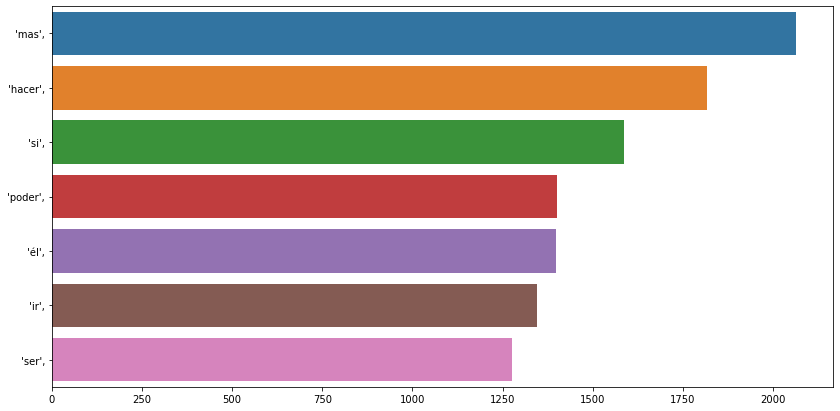

In [5]:
plt.figure(figsize = (14,7))
words = df[df["corrected_preprocessed"] != ""]
words = [word for xIndex, x in words.iterrows() for word in x["corrected_preprocessed"].split()]
# print(words)
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x)

## 2. n-gram

In [7]:
# processed list of words to str
df['corrected_preprocessed'] = df['corrected_preprocessed'].apply(eval).apply(' '.join)
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,...,emoticons_list,filename,preprocessed_data_without_hashtags,data_source,lang,score,langTb,lang_langdetect,corrected_preprocessed,preprocessed_str_without_hashtags
0,0,0,2021-03-27T04:09:42+00:00,1.375661e+18,1.375265e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,...,[':/'],Mayo_SPANISH_tweets_stweet.csv,"['hacer', 'mayo', 'cazar', 'fantasma']",Twitter,es,NaN,NaN,NaN,hacer mayo cazar fantasma,hacer mayo cazar fantasma
1,1,1,2021-03-22T21:12:09+00:00,1.374107e+18,1.374107e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,...,[],Mayo_SPANISH_tweets_stweet.csv,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",Twitter,es,NaN,NaN,NaN,despues esperar ancia ahora esperar despues se...,despues esperar ancia ahora esperar despues se...
2,2,2,2021-03-22T12:30:53+00:00,1.373975e+18,1.373975e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,...,[],Mayo_SPANISH_tweets_stweet.csv,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",Twitter,es,NaN,NaN,NaN,esperar llegar oido nuevo iniciar laboral part...,esperar llegar oido nuevo iniciar laboral part...
3,3,3,2021-04-04T12:56:55+00:00,1.378693e+18,1.378693e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,...,[],Mayo_SPANISH_tweets_stweet.csv,"['menos', 'mes', 'urkullu', 'temer', 'perder',...",Twitter,es,NaN,NaN,NaN,menos mes urkullu temer perder control dar pas...,menos mes urkullu temer perder control dar pas...
4,4,4,2021-04-03T20:14:57+00:00,1.378441e+18,1.378441e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,...,"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,"['edicion', 'festival', 'internacional', 'puen...",Twitter,es,NaN,NaN,NaN,edicion festival internacional puente hacia ce...,edicion festival internacional puente hacia ce...


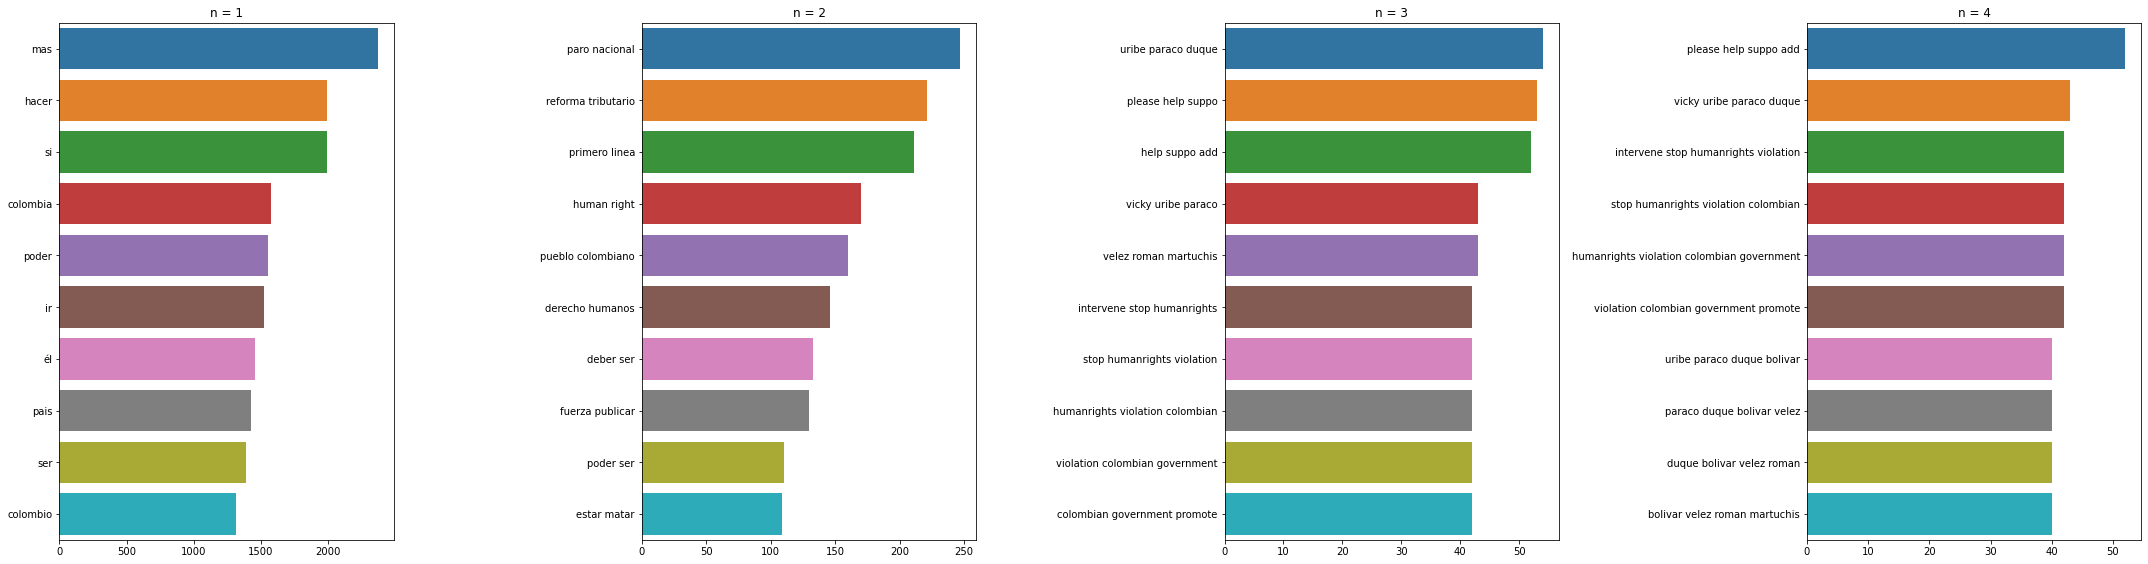

In [8]:
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:10]


fig, axs = plt.subplots(ncols = 4, figsize = (30, 8))
top_n_bigrams = get_top_ngram(df["corrected_preprocessed"], 1)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[0])
top_n_bigrams = get_top_ngram(df["corrected_preprocessed"], 2)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[1])
top_tri_grams=get_top_ngram(df["corrected_preprocessed"], n = 3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x = y, y = x, ax = axs[2])
top_quad_grams=get_top_ngram(df["corrected_preprocessed"], n = 4)
x,y = map(list, zip(*top_quad_grams))
sns.barplot(x = y, y = x, ax = axs[3])

axs[0].set_title("n = 1")
axs[1].set_title("n = 2")
axs[2].set_title("n = 3")
axs[3].set_title("n = 4")
fig.tight_layout(pad = 1.3)
# fig.savefig("ngram.png")

## 3. Word Cloud

#### Split English & Spanish

In [9]:
df_es = df[df['lang']=='es']
df_en = df[df['lang']=='en']
# df_es.info()

#### English Wordcloud

In [11]:
# processed list of words to str
# df_en['corrected_preprocessed'] = df_en['corrected_preprocessed'].apply(eval).apply(' '.join)
df_en.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,...,emoticons_list,filename,preprocessed_data_without_hashtags,data_source,lang,score,langTb,lang_langdetect,corrected_preprocessed,preprocessed_str_without_hashtags
16690,16690,0,2021-04-23T07:14:36+00:00,1.385492e+18,1.385492e+18,📢Join the seminar aiming at supporting #1May #...,en,False,False,5.0,...,[],Mayo_ENGLISH_tweets_stweet.csv,"['join', 'seminar', 'aim', 'support', 'trade',...",Twitter,en,NaN,NaN,NaN,join seminar aim support trade union activity ...,join seminar aim support trade union activity ...
16691,16691,1,2021-04-22T04:12:43+00:00,1.385084e+18,1.384885e+18,@julioacosta1701 @DiazCanelB @AlejandroGilF @r...,es,False,False,7.0,...,[],Mayo_ENGLISH_tweets_stweet.csv,"['caliente', 'tweetazo']",Twitter,en,NaN,NaN,NaN,caliente tweetazo,caliente tweetazo
16692,16692,2,2021-04-22T04:12:00+00:00,1.385084e+18,1.384803e+18,@julioacosta1701 @AliRubioGlez @Vicente7397772...,es,False,False,7.0,...,[],Mayo_ENGLISH_tweets_stweet.csv,['sumo'],Twitter,en,NaN,NaN,NaN,sumo,sumo
16693,16693,3,2021-04-22T04:09:48+00:00,1.385083e+18,1.384882e+18,@AdrinMartnezGo1 @julioacosta1701 @DiazCanelB ...,es,False,False,6.0,...,[],Mayo_ENGLISH_tweets_stweet.csv,"['hay', 'diocancancan']",Twitter,en,NaN,NaN,NaN,hay diocancancan,hay diocancancan
16694,16694,4,2021-04-22T03:32:26+00:00,1.385074e+18,1.384941e+18,@VilmaPrez14 @Laura53538740 @Granma_Digital @D...,es,False,False,5.0,...,[],Mayo_ENGLISH_tweets_stweet.csv,"['con', 'mucha', 'conciencia']",Twitter,en,NaN,NaN,NaN,con mucha conciencia,con mucha conciencia


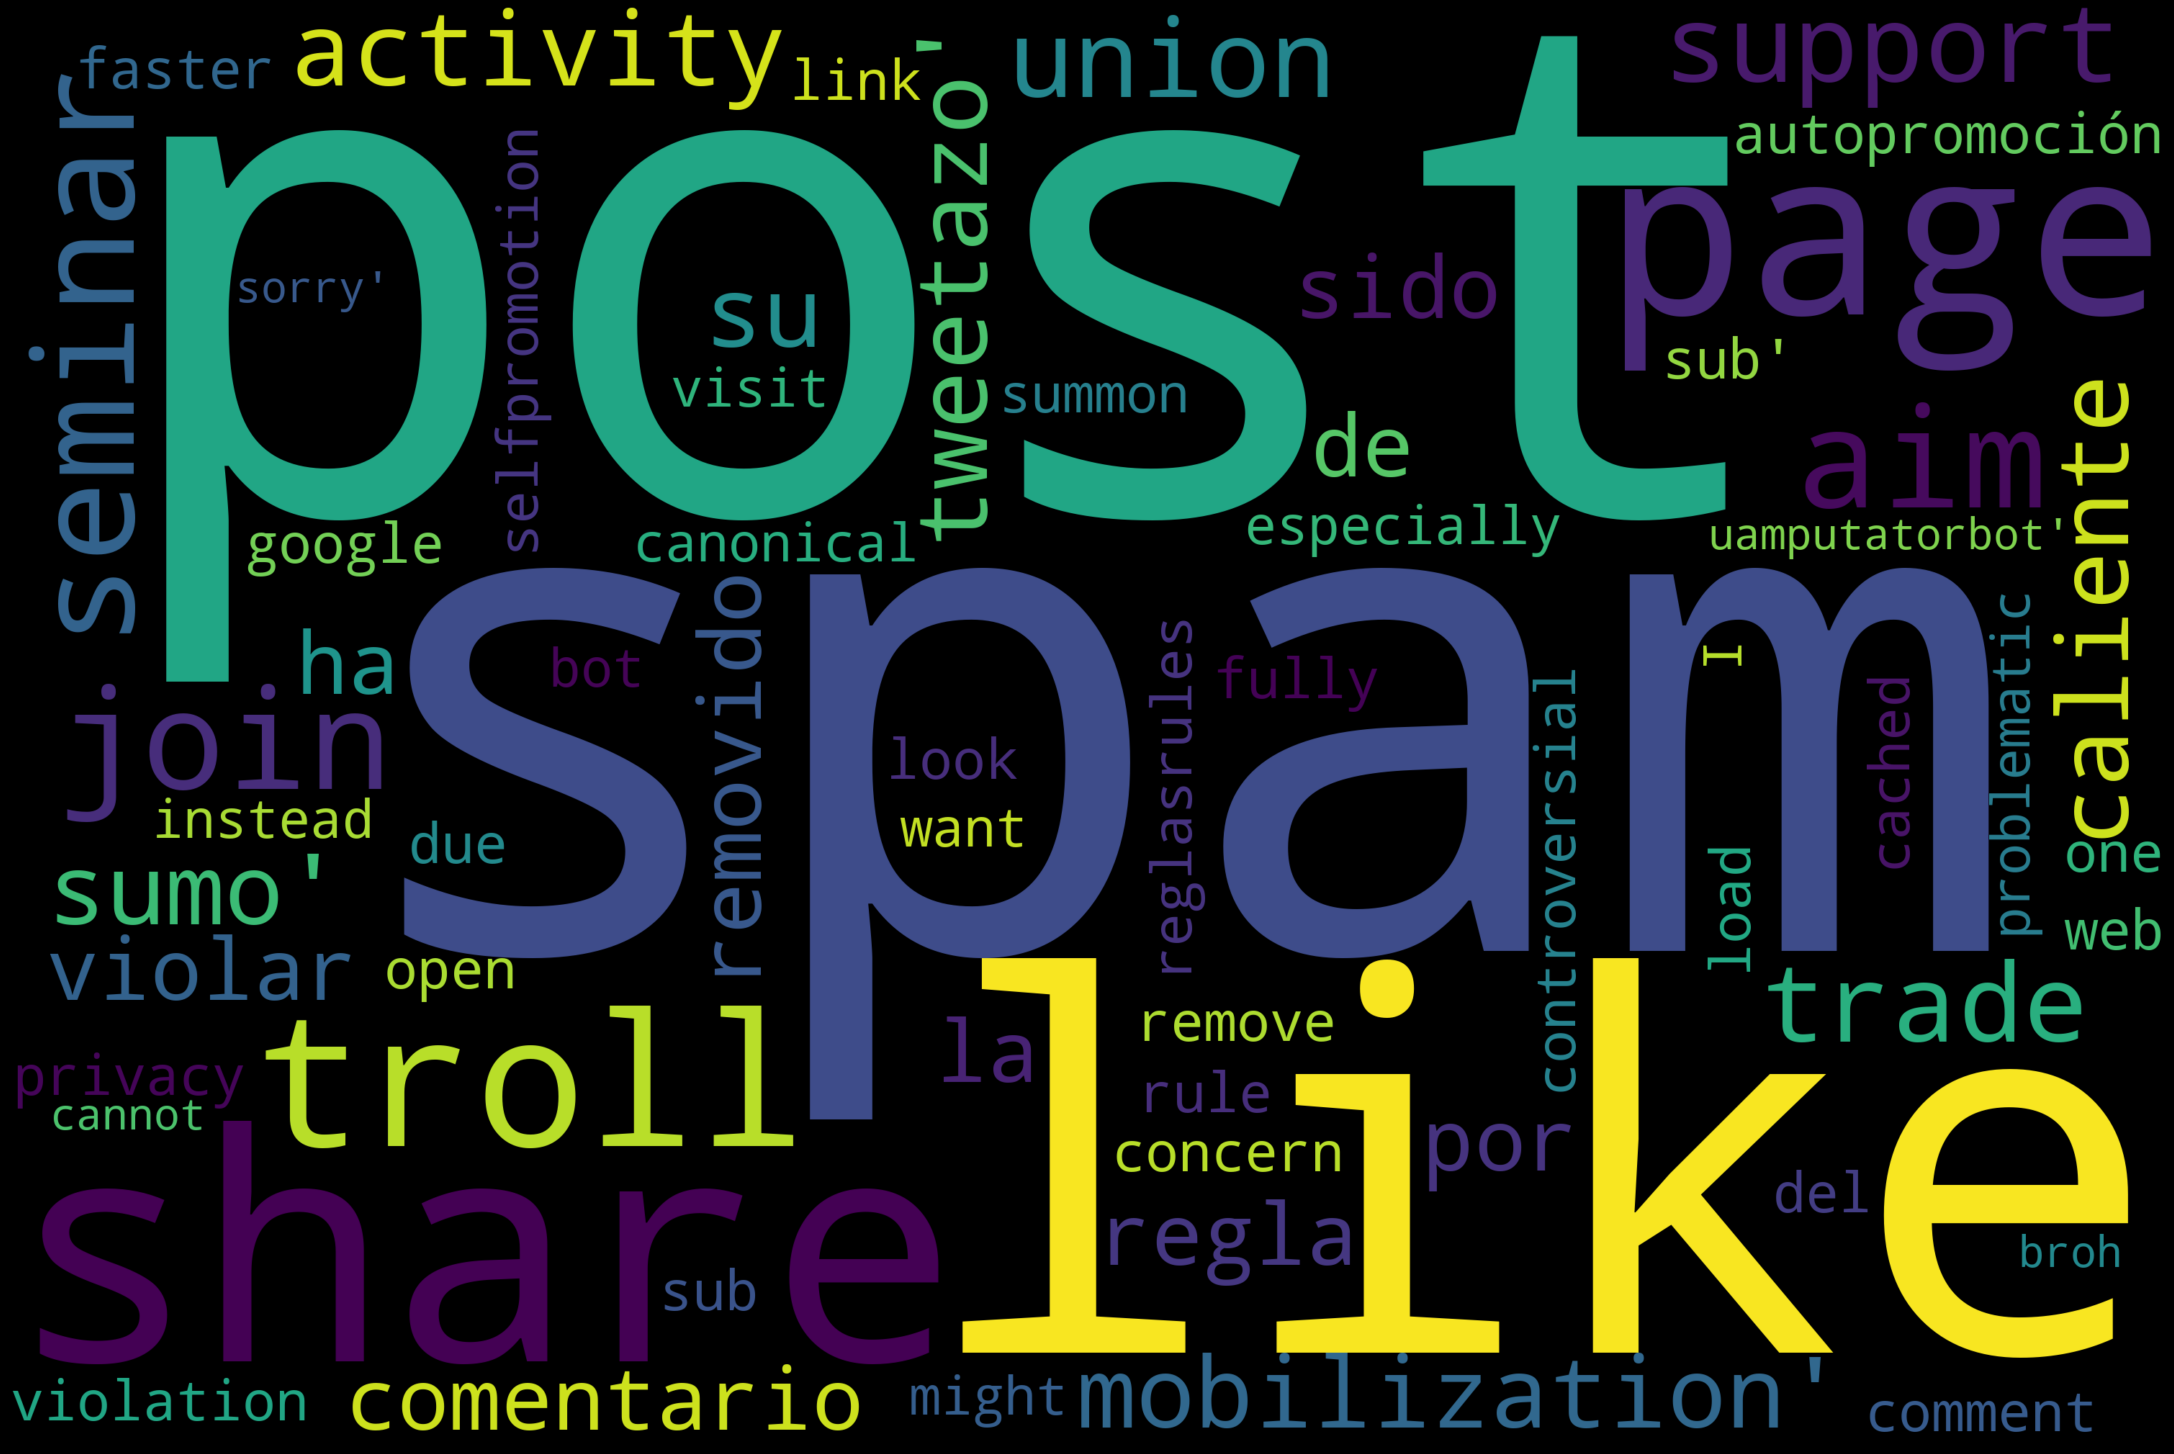

In [15]:
text = df_en.corrected_preprocessed.values
STOPWORDS = ["amp", "mayo","gazaunderattack'","palestinianlivesmatter",
             "israelterrorist""israelterrorists","save_sheikh_jarrah"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


#### Spanish Wordcloud

In [13]:
# processed list of words to str
# df_es['preprocessed_str_without_hashtags'] = df_es['preprocessed_data_without_hashtags'].apply(eval).apply(' '.join)
df_es.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,...,emoticons_list,filename,preprocessed_data_without_hashtags,data_source,lang,score,langTb,lang_langdetect,corrected_preprocessed,preprocessed_str_without_hashtags
0,0,0,2021-03-27T04:09:42+00:00,1.375661e+18,1.375265e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,...,[':/'],Mayo_SPANISH_tweets_stweet.csv,"['hacer', 'mayo', 'cazar', 'fantasma']",Twitter,es,NaN,NaN,NaN,hacer mayo cazar fantasma,hacer mayo cazar fantasma
1,1,1,2021-03-22T21:12:09+00:00,1.374107e+18,1.374107e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,...,[],Mayo_SPANISH_tweets_stweet.csv,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",Twitter,es,NaN,NaN,NaN,despues esperar ancia ahora esperar despues se...,despues esperar ancia ahora esperar despues se...
2,2,2,2021-03-22T12:30:53+00:00,1.373975e+18,1.373975e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,...,[],Mayo_SPANISH_tweets_stweet.csv,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",Twitter,es,NaN,NaN,NaN,esperar llegar oido nuevo iniciar laboral part...,esperar llegar oido nuevo iniciar laboral part...
3,3,3,2021-04-04T12:56:55+00:00,1.378693e+18,1.378693e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,...,[],Mayo_SPANISH_tweets_stweet.csv,"['menos', 'mes', 'urkullu', 'temer', 'perder',...",Twitter,es,NaN,NaN,NaN,menos mes urkullu temer perder control dar pas...,menos mes urkullu temer perder control dar pas...
4,4,4,2021-04-03T20:14:57+00:00,1.378441e+18,1.378441e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,...,"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,"['edicion', 'festival', 'internacional', 'puen...",Twitter,es,NaN,NaN,NaN,edicion festival internacional puente hacia ce...,edicion festival internacional puente hacia ce...


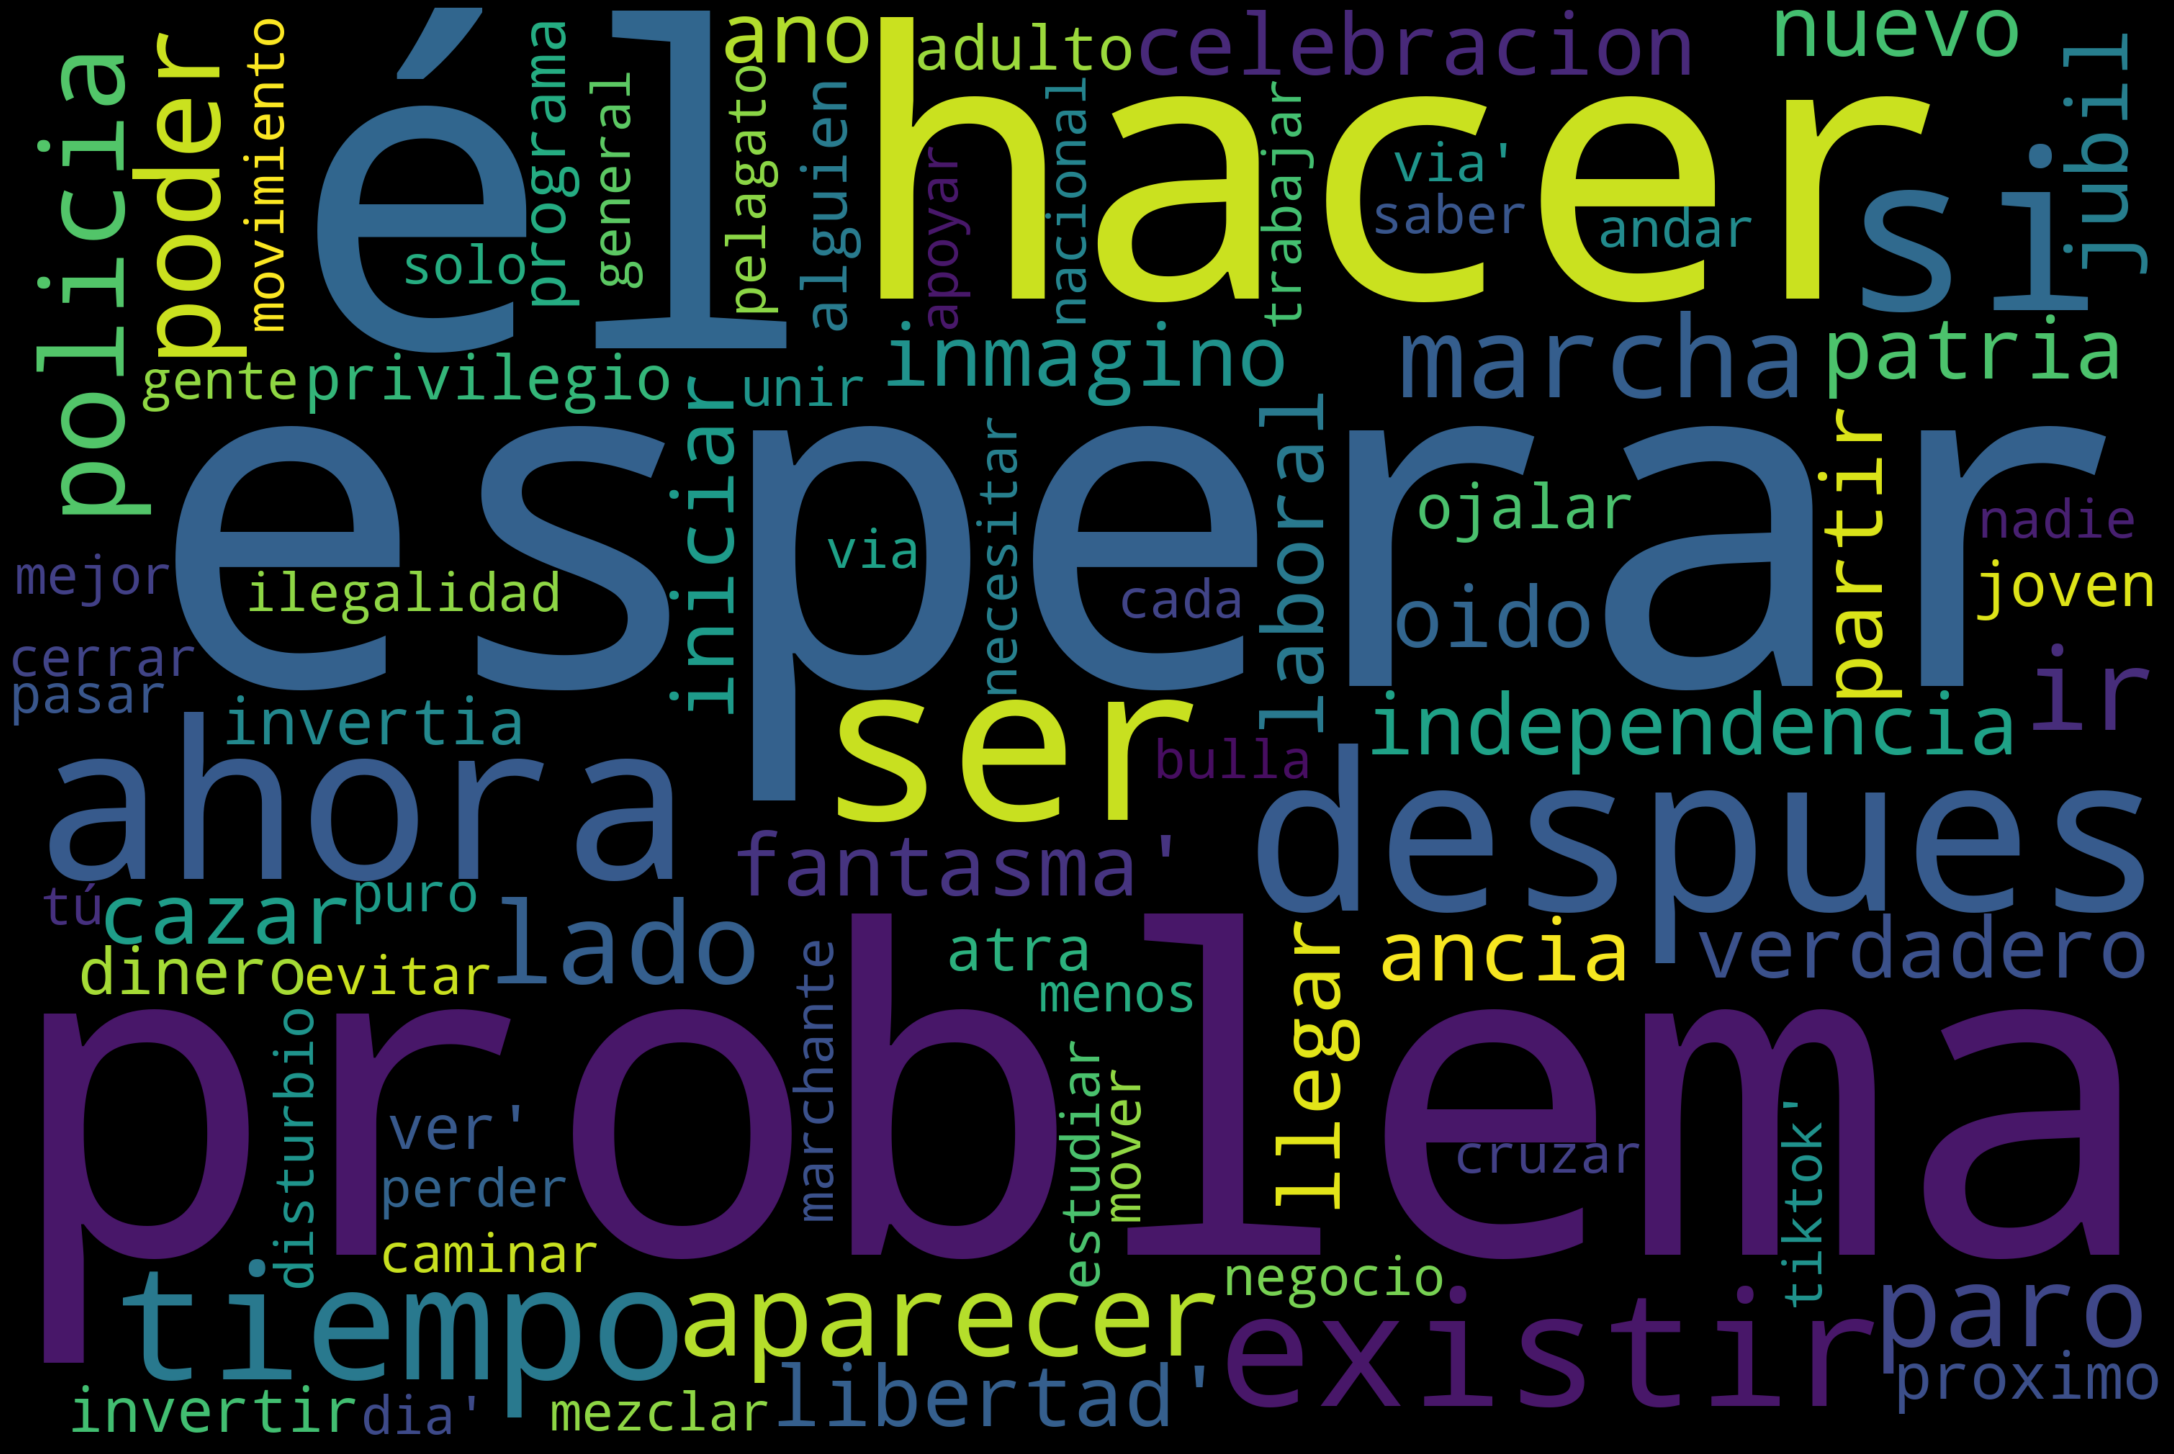

In [16]:
text = df_es.corrected_preprocessed.values
STOPWORDS = ["amp", "mayo","gazaunderattack'","palestinianlivesmatter",
             "israelterrorist""israelterrorists","save_sheikh_jarrah"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [17]:
text

array(['hacer mayo cazar fantasma',
       'despues esperar ancia ahora esperar despues ser inmagino celebracion ano independencia patria ahora si jubil ser verdadero libertad',
       'esperar llegar oido nuevo iniciar laboral partir proximo dinero invertia privilegio tiempo atra invertir programa joven adulto ojalar alguien ver',
       ...,
       'existir ilegalidad movimiento problema aparecer policia tú poder unir él marcha problema poder caminar andar lado mezclar él marchante problema aparecer policia negocio general cerrar menos existir disturbio lado si necesitar mover él mejor evitar via marcha perder tiempo cruzar via',
       'pelagato ir ir pasar puro bulla nadie apoyar gente estudiar trabajar solo hacer paro nacional cada dia',
       'paro saber tiktok'], dtype=object)

In [29]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][16535])

desesperacion talvez fin cabo mas facil pasar él pais vecino entrada mas facil brasil ejemplo aqui mas facil conseguir harina huevo basicamente cualquiera cosa comer moneda aunque devaluado seguir ser mas util venezolano apenas servir limpiar él culo facilidad pasar colombia lugar mejor panamo ejemplo etcétera aun asi poder negar esencia mismo mierda cambiar politico abiertamente socialista echar culpa malo pasar pais gringo colombio derecha echar culpa fantasma comunismo llamar abiertamente comunista gente ejercer derecho manifestar él ambos usar miedo mantener poder ambos estar centralizado ambos desaparecer gente segun convenir ambos medio mas grande comprado lista seguir si venezolano pasar aca querer conocer primero gustar mayoria colombiano tratar criminal amir hecho tocar parar él semaforo pedir plata mejor poder hacer menos peor significar mejor xd


In [30]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'])

0                                hacer mayo cazar fantasma
3591                     fantasma votar drama sufrir trave
3932     politica economico duque eficaz decir vecino j...
4039     alias memo fantasma liderar operación narcotra...
4952     buen tarde ordenar captura narco avioneta inve...
4956     paro convertido fantasma recorrer calle plaza ...
16535    desesperacion talvez fin cabo mas facil pasar ...
Name: corrected_preprocessed, dtype: object


In [31]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][4956])

paro convertido fantasma recorrer calle plaza carretero imposible atajar agarrar extinguir energia pueblo juventud decir bastar


In [32]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][4952])

buen tarde ordenar captura narco avioneta investigar paraco ciudad badcrim investigación descuartizado hablar memo fantasma colombio impunidad


In [33]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][4039])

alias memo fantasma liderar operación narcotrafico autodefensa bloque metro mas grave creer sociedad junto esposo martho lucia ramirez exministra defensa gobierno uribelo minimo renuncia


In [34]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][3932])

politica economico duque eficaz decir vecino jodiar economia naranjo fantasma dolar paraiso fiscal suizo desgraciado trabajar


In [35]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][3591])

fantasma votar drama sufrir trave


In [36]:
print(df_es[df_es['corrected_preprocessed'].str.contains("fantasma")]['corrected_preprocessed'][0])

hacer mayo cazar fantasma
